
#**House Sale Prices Prediction**

###**Introduction of Dataset**

The data that is used for predicting the house prices is obtained from the paper written by Dean de Cock in 2017. What was the need of collecting the data from where it is collected and why it is collected all mention in this [paper](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627).

This paper illustrate about the data set related to the sale of individual residential property in Ames, Iowa from 2006 to 2010. 
The data set contains:

- 2930 observations
- explanatory variables
   - 23 nominal
   - 23 ordinal
   - 14 discrete
   - 20 continous

These variable involved in assessing sale price of home. 

### **Goal of the project**

The goal for this project is to use linear regression model for analyzing to determine the variables out of 79 given in the dataset for estimating the sale prices of house by using available library resources (sklearn.model, pandas, numpy).







In [ ]:
# importing a python that will be useful during the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [ ]:
# reading the data file and reading first n files rows value
df= pd.read_csv("/content/drive/MyDrive/AmesHousing.csv")
print(df.head())

   Order        PID  MS SubClass  ... Sale Type  Sale Condition  SalePrice
0      1  526301100           20  ...       WD           Normal     215000
1      2  526350040           20  ...       WD           Normal     105000
2      3  526351010           20  ...       WD           Normal     172000
3      4  526353030           20  ...       WD           Normal     244000
4      5  527105010           60  ...       WD           Normal     189900

[5 rows x 82 columns]


In [ ]:
# determining the shape of the data
df.shape

(2930, 82)

In [ ]:
# obtaining the description of the sale prices column
df["SalePrice"].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
# Studying about the data types for every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

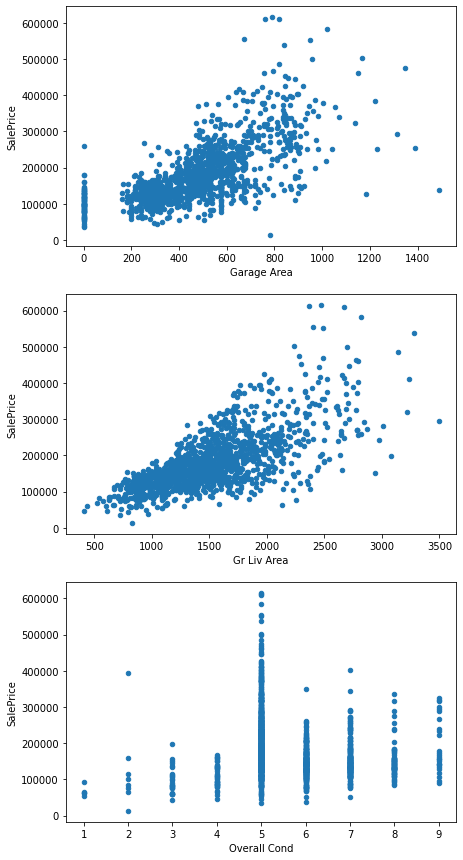

In [ ]:
#splitting data into approx 50% for obtainning train and test data set
# plotting the scatter plots between sale prices and 3 variables to understanding the dependency
train = df[0:1460] 
test = df[1460:]
fig = plt.figure(figsize=(7,15))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond", y="SalePrice", ax=ax3, kind="scatter")


In [ ]:
# From the last cell we can say that "Gr Liv Area" correlates most with the "SalePrice" column. 
#It can be confirmed by calculating correlation between pair of these columns.
print(train[["Garage Area", "Gr Liv Area", "Overall Cond", "SalePrice"]].corr())

              Garage Area  Gr Liv Area  Overall Cond  SalePrice
Garage Area      1.000000     0.465366     -0.132401   0.662397
Gr Liv Area      0.465366     1.000000     -0.133710   0.698990
Overall Cond    -0.132401    -0.133710      1.000000  -0.099395
SalePrice        0.662397     0.698990     -0.099395   1.000000


We will make the pipeline and try to improve as we move forwad to reduce RMSE values.

In [ ]:
# making the pipeline which will be update as we will move forward to reduce the RMSE values

def transform_features(df):
  return (df)

def select_features(df):
  return df[["Gr Liv Area", "SalePrice"]]# The reason of chossing Gr Liv area because of its corelation with sale price which is 0.69(Calucated on the above cell)

def train_and_test(df):
  train = df[0:1460] #splitting data into approx 50% for obtainning train and test data set
  test = df[1460:]
  
  numeric_train = train.select_dtypes(include=["integer","float"])
  numeric_test = test.select_dtypes(include=["integer","float"])
  lr = linear_model.LinearRegression()
  mse = mean_squared_error
  # 
  features = numeric_train.columns.drop("SalePrice")

  lr.fit(train[features], train["SalePrice"])

  test_prediction = lr.predict(test[features])
  
  test_mse = mse(test_prediction, test["SalePrice"])
  test_rmse = np.sqrt(test_mse)
  return test_rmse

transform_df = transform_features(df)
filtered_df = select_features(transform_df)
train_and_test(filtered_df) 

57088.25161263909

###Transform Feature

1. From all columns dropping those columns with 5% or more missing value.
2. Dropping text column with one or more missing values
3. Filling the numerical columns with the most common value.

In [ ]:
# From all columns dropping those columns with 5% or more missing value
number_miss = df.isnull().sum()

drop_missing_cols = number_miss[(number_miss > len(df)/20)].sort_values()
df = df.drop(drop_missing_cols.index, axis=1)
print(df.head())
print(df.shape)

   Order        PID  MS SubClass  ... Sale Type  Sale Condition SalePrice
0      1  526301100           20  ...       WD           Normal    215000
1      2  526350040           20  ...       WD           Normal    105000
2      3  526351010           20  ...       WD           Normal    172000
3      4  526353030           20  ...       WD           Normal    244000
4      5  527105010           60  ...       WD           Normal    189900

[5 rows x 71 columns]
(2930, 71)


In [ ]:
#Dropping text column with one or more missing values
text_counts = df.select_dtypes(include = ["object"]).isnull().sum()
text_counts = text_counts.sort_values()

drop_missing_cols_2 = text_counts[text_counts>0]

df= df.drop(drop_missing_cols_2.index, axis=1)
df.shape

(2930, 64)

3. 

In [ ]:
#Filling the numerical columns with the most common value
num_missing = df.select_dtypes(include=["int", "float"]).isnull().sum()
fix_numcols = num_missing[(num_missing< len(df)*0.05) & (num_missing>0)].sort_values()
fix_numcols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [ ]:
replace_values = df[fix_numcols.index].mode().to_dict(orient = "records")[0]
replace_values

{'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Bsmt Unf SF': 0.0,
 'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Garage Area': 0.0,
 'Garage Cars': 2.0,
 'Mas Vnr Area': 0.0,
 'Total Bsmt SF': 0.0}

In [ ]:
df = df.fillna(replace_values)

In [ ]:
df.isnull().sum().value_counts()

0    64
dtype: int64

In [ ]:
#Data regarding specific years ('Year Remod/Add', 'Year Built', Yr sold) may not be usable for predecting the values
#Although, calculating difference between the two columns may be of value
yr_sold= df["Yr Sold"] - df["Year Built"]

years_remod = df["Yr Sold"] - df["Year Remod/Add"]

In [ ]:
# Adding new column in the dataset with the name Years before sale
df["Years Before Sale"] = yr_sold
df["Years Before Sale"].value_counts().sort_index()[:3]

-1      1
 0    116
 1    218
Name: Years Before Sale, dtype: int64

In [ ]:
df["Years Before Sale"][df["Years Before Sale"]<0]

2180   -1
Name: Years Before Sale, dtype: int64

In [ ]:
# dropping this values as it may be a wrong value
df = df.drop([2180],axis=0)

In [ ]:
# Adding new column in the dataset with the name Years remod
df["Years Remod"] = years_remod
df["Years Remod"].value_counts().sort_index()[:8]


-1      2
 0    238
 1    193
 2    104
 3     97
 4    111
 5     91
 6     83
Name: Years Remod, dtype: int64

In [ ]:
df["Years Remod"][df["Years Remod"]<0]

1702   -1
2181   -1
Name: Years Remod, dtype: int64

In [ ]:
# dropping this values as it may be a wrong value
df = df.drop([1702,2181], axis=0)

In [ ]:
df = df.drop(["Year Built", "Year Remod/Add", "Yr Sold"], axis=1)

df.shape

(2927, 63)

In [ ]:
df.head(2)

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Sale Type,Sale Condition,SalePrice,Years Before Sale,Years Remod
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,639.0,0.0,441.0,1080.0,GasA,Fa,Y,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,5,WD,Normal,215000,50,50
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,468.0,144.0,270.0,882.0,GasA,TA,Y,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,6,WD,Normal,105000,49,49


In [ ]:
# Dropping those column which are of no use 
# also those columns which leaks data related to final sale
df = df.drop(["Order", "PID"], axis = 1)


df = df.drop(["Mo Sold", "Sale Type", "Sale Condition"],axis=1)

print(df.shape)
print(df.head(2))

(2927, 58)
   MS SubClass MS Zoning  Lot Area  ... SalePrice Years Before Sale Years Remod
0           20        RL     31770  ...    215000                50          50
1           20        RH     11622  ...    105000                49          49

[2 rows x 58 columns]


Text(0, 0.5, 'SalePrice')

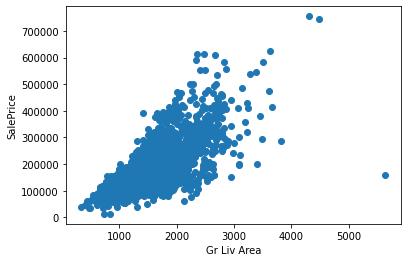

In [ ]:
# elimnating 1 observations which correspond to unusual sales, sales of houses of more than 5000 square meters
plt.scatter(df["Gr Liv Area"], df["SalePrice"])
plt.xlabel("Gr Liv Area")
plt.ylabel("SalePrice")

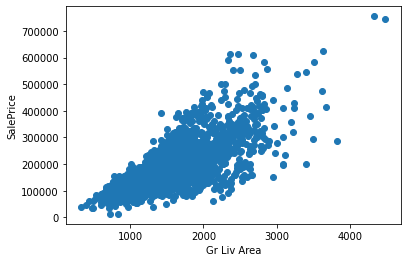

(2926, 58)

In [ ]:
wrong_rows = df[df["Gr Liv Area"]>5000]

df= df.drop(wrong_rows.index, axis=0)

plt.scatter(df["Gr Liv Area"], df["SalePrice"])
plt.xlabel("Gr Liv Area")
plt.ylabel("SalePrice")
plt.show()
df.shape

In [ ]:
def transform_features(df):

  # From all columns dropping those columns with 5% or more missing value
  number_miss = df.isnull().sum()
  drop_missing_cols = number_miss[(number_miss > len(df)/20)].sort_values()
  df = df.drop(drop_missing_cols.index, axis=1)

  #Dropping text column with one or more missing values
  text_counts = df.select_dtypes(include = ["object"]).isnull().sum()
  text_counts = text_counts.sort_values()
  drop_missing_cols_2 = text_counts[text_counts>0]
  df= df.drop(drop_missing_cols_2.index, axis=1)

  #Filling the numerical columns with the most common value
  num_missing = df.select_dtypes(include=["int", "float"]).isnull().sum()
  fix_numcols = num_missing[(num_missing< len(df)*0.05) & (num_missing>0)].sort_values()
  replace_values = df[fix_numcols.index].mode().to_dict(orient = "records")[0]
  df = df.fillna(replace_values)
  

  #Data regarding specific years ('Year Remod/Add', 'Year Built', Yr sold) may not be usable for predecting the values
  #Although, calculating difference between the two columns may be of value
  yr_sold= df["Yr Sold"] - df["Year Built"]
  years_remod = df["Yr Sold"] - df["Year Remod/Add"]
  df["Years Remod"] = years_remod
  df["Years Before Sale"] = yr_sold
  df = df.drop([2180],axis=0)
  
  

  df = df.drop([1702,2181], axis=0)
  df = df.drop(["Year Built", "Year Remod/Add"], axis=1)
  df = df.drop(["Order", "PID"], axis = 1)
  df = df.drop(["Mo Sold", "Sale Type", "Sale Condition"],axis=1)

  # elimnating 1 observations which correspond to unusual sales, sales of houses of more than 5000 square meters
  wrong_rows = df[df["Gr Liv Area"]>5000]
  df= df.drop(wrong_rows.index, axis=0)

  return df

def select_features(df):
  return df[["Gr Liv Area", "SalePrice"]]# The reason of chossing Gr Liv area because of its corelation with sale price which is 0.69(Calucated on the above cell)

def train_and_test(df):
  train = df[0:1460] #splitting data into approx 50% for obtainning train and test data set
  test = df[1460:]
  
  numeric_train = train.select_dtypes(include=["integer","float"])
  numeric_test = test.select_dtypes(include=["integer","float"])
  lr = linear_model.LinearRegression()
  mse = mean_squared_error
  # 
  features = numeric_train.columns.drop("SalePrice")

  lr.fit(train[features], train["SalePrice"])

  test_prediction = lr.predict(test[features])
  
  test_mse = mse(test_prediction, test["SalePrice"])
  test_rmse = np.sqrt(test_mse)
  return test_rmse

df = pd.read_csv("/content/drive/MyDrive/AmesHousing.csv")#read again original dataframe for avoiding previous modifications
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
train_and_test(filtered_df) 

53699.89964002601

So after cleaning data we wre able to see the reduction in the RMSE

Now reducing the RMSE values more we need to operate on features

In [ ]:
# generating only num columns persent in the dataset
num_df = transform_df.select_dtypes(include=["int","float"])
num_df.head(2)

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Remod,Years Before Sale
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0,215000,50,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,105000,49,49


<function matplotlib.pyplot.show>

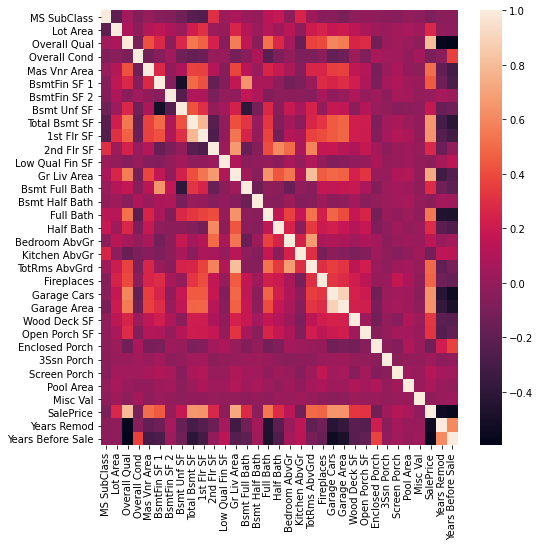

In [ ]:
#now looking heatmap to understand abot the corelation of sale price with the other numerical columns
import seaborn as sns
corr_matrix = num_df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix)
plt.show

In [ ]:
#getting numerical corelation values
abs_corr = num_df.corr()["SalePrice"].abs().sort_values()
abs_corr

BsmtFin SF 2         0.006101
Misc Val             0.019282
3Ssn Porch           0.032260
Bsmt Half Bath       0.035898
Low Qual Fin SF      0.037639
Pool Area            0.071877
MS SubClass          0.085123
Overall Cond         0.101591
Screen Porch         0.112258
Kitchen AbvGr        0.119781
Enclosed Porch       0.128721
Bedroom AbvGr        0.143934
Bsmt Unf SF          0.182736
2nd Flr SF           0.269827
Lot Area             0.270311
Bsmt Full Bath       0.276950
Half Bath            0.285058
Open Porch SF        0.317330
Wood Deck SF         0.328323
BsmtFin SF 1         0.450753
Fireplaces           0.476286
TotRms AbvGrd        0.499978
Mas Vnr Area         0.508681
Years Remod          0.535209
Full Bath            0.546252
Years Before Sale    0.559231
Garage Area          0.643963
1st Flr SF           0.645455
Garage Cars          0.648407
Total Bsmt SF        0.660673
Gr Liv Area          0.727013
Overall Qual         0.802520
SalePrice            1.000000
Name: Sale

In [ ]:
#finding the columns which having corelation values smaller than 0.5
abs_corr[abs_corr>0.5]

Mas Vnr Area         0.508681
Years Remod          0.535209
Full Bath            0.546252
Years Before Sale    0.559231
Garage Area          0.643963
1st Flr SF           0.645455
Garage Cars          0.648407
Total Bsmt SF        0.660673
Gr Liv Area          0.727013
Overall Qual         0.802520
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [ ]:
#dropping the columns which having corelation values smaller than 0.5
transform_df = transform_df.drop(abs_corr[abs_corr <0.5].index, axis = 1)
print(transform_df.head(2))

  MS Zoning Street Lot Shape  ... SalePrice Years Remod Years Before Sale
0        RL   Pave       IR1  ...    215000          50                50
1        RH   Pave       Reg  ...    105000          49                49

[2 rows x 36 columns]


In [ ]:
transform_df.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Total Bsmt SF', 'Heating',
       'Heating QC', 'Central Air', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'Kitchen Qual', 'Functional', 'Garage Cars', 'Garage Area',
       'Paved Drive', 'SalePrice', 'Years Remod', 'Years Before Sale'],
      dtype='object')

In [ ]:
nominal_features = ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'Kitchen Qual', 'Functional', 'Garage Cars', 'Garage Area', 'Paved Drive', 'Years Remod', 'Years Before Sale']

In [ ]:
# Which categorical columns have we still carried with us? We'll test these
transform_cat_columns = []
for col in nominal_features:
  if col in transform_df.columns:
    transform_cat_columns.append(col)

# How many unique values in each categorical column?
uniquness_count = transform_df[transform_cat_columns].apply(lambda col: len(col.value_counts())).sort_values()

# Aribtrary cutoff of 10 unique values (worth experimenting)
drop_nonuniq_cols = uniquness_count[uniquness_count > 10].index
transform_df = transform_df.drop(drop_nonuniq_cols, axis=1)

In [ ]:
# Select just the remaining text columns and convert to categorical
text_cols = transform_df.select_dtypes(include = ["object"])
for col in text_cols:
  transform_df[col] = transform_df[col].astype("category")

# Create dummy columns and add back to the dataframe
transform_df = pd.concat([transform_df, pd.get_dummies(transform_df.select_dtypes(include=["category"]))],axis=1)
transform_df = transform_df.drop(text_cols, axis=1)


In [ ]:
def transform_features(df):

   # From all columns dropping those columns with 5% or more missing value
    number_miss = df.isnull().sum()
    drop_missing_cols = number_miss[(number_miss > len(df)/20)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)

  #Dropping text column with one or more missing values
    text_counts = df.select_dtypes(include = ["object"]).isnull().sum()
    text_counts = text_counts.sort_values(ascending = False)
    drop_missing_cols_2 = text_counts[text_counts > 0]
    df= df.drop(drop_missing_cols_2.index, axis=1)

  #Filling the numerical columns with the most common value
    num_missing = df.select_dtypes(include=["int", "float"]).isnull().sum()
    fix_numcols = num_missing[(num_missing< len(df)*0.05) & (num_missing>0)].sort_values()##
    replace_values = df[fix_numcols.index].mode().to_dict(orient = "records")[0]
    df = df.fillna(replace_values)
  

  #Data regarding specific years ('Year Remod/Add', 'Year Built', Yr sold) may not be usable for predecting the values
  #Although, calculating difference between the two columns may be of value
    yr_sold= df["Yr Sold"] - df["Year Built"]
    years_remod = df["Yr Sold"] - df["Year Remod/Add"]
    df["Years Remod"] = years_remod
    df["Years Before Sale"] = yr_sold
  
  
    df = df.drop([2180],axis=0)
  
  
    df = df.drop([1702,2181], axis=0)
    df = df.drop(["Year Built", "Year Remod/Add"], axis=1)
    df = df.drop(["Order", "PID"], axis = 1)
    df = df.drop(["Mo Sold", "Sale Type", "Sale Condition"],axis=1)

  # elimnating 1 observations which correspond to unusual sales, sales of houses of more than 5000 square meters
    wrong_rows = df[df["Gr Liv Area"]>5000]
    df= df.drop(wrong_rows.index, axis=0)

    return df

def select_features(df):
    num_df = df.select_dtypes(include=["int","float"])
    abs_corr = num_df.corr()["SalePrice"].abs().sort_values()
    df = df.drop(abs_corr[abs_corr <0.4].index, axis = 1)

    nominal_features = ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'Kitchen Qual', 'Functional', 'Garage Cars', 'Garage Area', 'Paved Drive', 'Years Remod', 'Years Before Sale']

    transform_cat_columns = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_columns.append(col)
      
    uniquness_count = df[transform_cat_columns].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniquness_count[uniquness_count > 10].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    

    text_cols = df.select_dtypes(include = ["object"])
    for col in text_cols:
      df[col] = df[col].astype("category")
  
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=["category"]))],axis=1)
    df = df.drop(text_cols, axis=1)
    

    return df

def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['int', 'float'])
    
    features = numeric_df.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()  
    mse = mean_squared_error
    
    if k == 0:
      train = df[:1460]
      test = df[1460:]
      lr.fit(train[features], train["SalePrice"])
      test_prediction = lr.predict(test[features])
      rmse = np.sqrt(mse(test_prediction, test["SalePrice"]))
      return rmse
    if k == 1:# Randomize *all* rows (frac=1) from `df` and return
      shuffle_df = df.sample(frac=1)
      train_df = df[:1460]
      test_df = df[1460:]
      lr.fit(train_df[features], train_df["SalePrice"])
      test_prediction = lr.predict(test_df[features])
      rmse_1 = np.sqrt(mse( test_df["SalePrice"],test_prediction))

      lr.fit(test_df[features], test_df["SalePrice"])
      train_prediction = lr.predict(train_df[features])
      rmse_2 = np.sqrt(mse(train_prediction, train_df["SalePrice"]))
      av_rmse = np.mean([rmse_1,rmse_2])
      return av_rmse

# The actual train and test validation only uses a half of our data for training the model, and the other for testing. 
# Using cross validation and randomly selecting our data for training, we can avoid some bias that could be happend when only select a part of the data for training. 
# we use k-fold cross validation
       #splitting the full dataset into k equal length partitions.
       #selecting k-1 partitions as the training set and
       #selecting the remaining partition as the test set
       #training the model on the training set.
       #using the trained model to predict labels on the test fold.
       #computing the test fold's error metric.
       #repeating all of the above steps k-1 times, until each partition has been used as the test set for an iteration.
       #calculating the mean of the k error values. 

    else:
      KF = KFold(n_splits=k, shuffle=True)
      rmse_val = []
      for train_index, test_index in KF.split(df):
        train = df.iloc[train_index]
        test = df.iloc[test_index]
        lr.fit(train[features], train["SalePrice"])
        predict = lr.predict(test[features])
        rmse = np.sqrt(mse(test["SalePrice"], predict))
        rmse_val.append(rmse)
      av_rmse = np.mean(rmse_val)
      return av_rmse


df = pd.read_csv("/content/drive/MyDrive/AmesHousing.csv")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4) 
rmse

36941.61436224246

In the conclusion we can see that the rmse values has been decreased after doing feature enginerring and also using more than one feature to determine the Sale prices of the hose.